In [168]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [169]:
threshold_dict = {'aluminium':2.8,'ammonia':32.5,'arsenic':0.01,'barium':2,'cadmium':0.005,'chloramine':4,'chromium':0.1,'copper':1.3,'flouride':1.5,'bacteria':0,'viruses':0,'lead':0.015,'nitrates':10,'nitrites':1,'mercury':0.002,'perchlorate':56,'radium':5,'selenium':0.5,'silver':0.1,'uranium':0.3}

## Dataframe

## The dataset has 7999 rows and 21 columns

# <font color="blue">Preprocessing</font>

In [170]:
missing_value = ['#NUM!',np.nan] #missing values given as #NUM! 

In [189]:
df = pd.read_csv('waterQuality1.csv') 

In [190]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [191]:
df.shape

(7999, 21)

In [192]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [193]:
df['is_safe']=df['is_safe'].map({'0':0,'1':1,'#NUM!':0})
ammo=[]
for i in range(len(df)):
    s=df.loc[i,'ammonia']
    if s=='#NUM!':
        ammo+=[0]
    else:
        ammo+=[float(s)]
df['ammonia']=ammo

In [194]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [195]:
df = df.astype({'is_safe':'int'})

## Ammonia column has all the values in object so we convert it to floating point

In [196]:
df.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

In [197]:
df["ammonia"] = df["ammonia"].apply(pd.to_numeric)

In [198]:
df.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

## Initialize Target Class

In [199]:
target_col = "is_safe"

## There are 3 missing values in each ammonia and is_safe column. 
Assuming that concentrations of those minerals in the water sample were too small to record, we replace it with 0.


# <font color="blue">EDA</font>

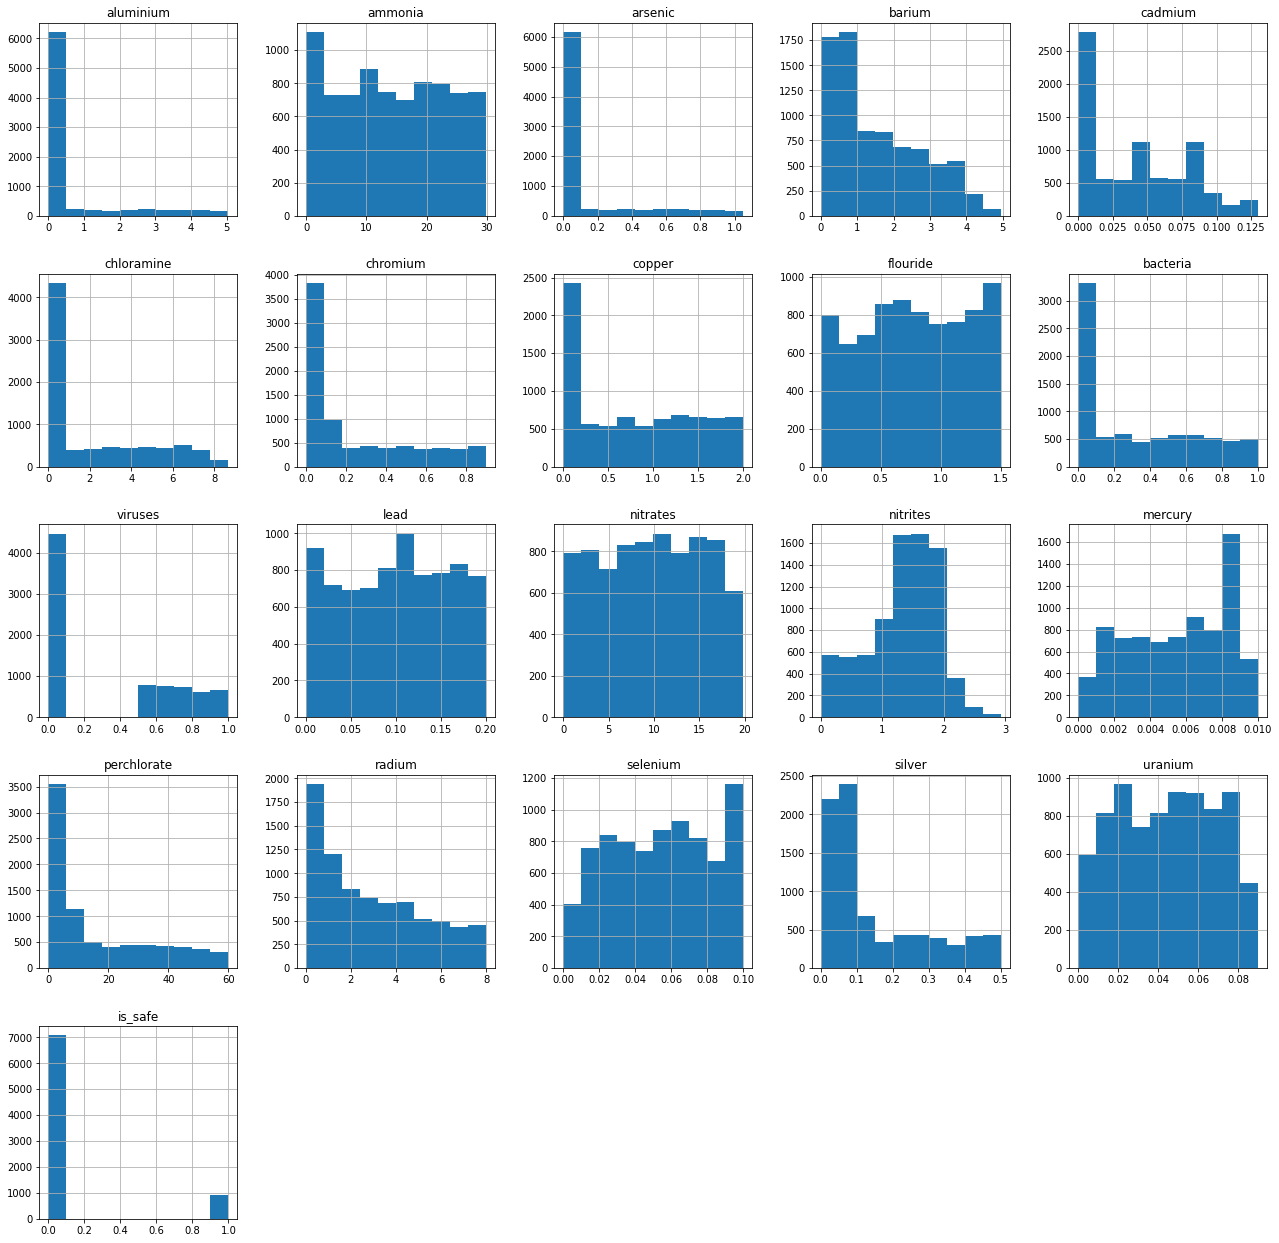

In [31]:
df.hist(figsize=(22,22))
plt.savefig('mineral_plot.png')
plt.show()

## Ammonia

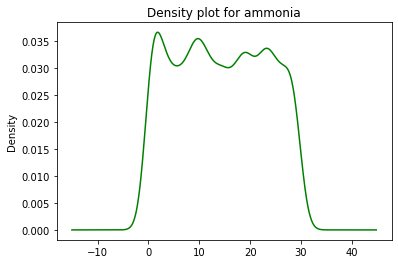

In [32]:
df.ammonia.plot.density(color='green')
plt.title('Density plot for ammonia')
plt.savefig('ammonia.png')
plt.show()

## Selenium

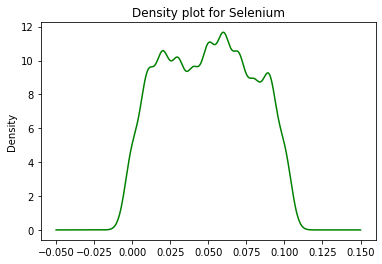

In [33]:
df.selenium.plot.density(color='green')
plt.title('Density plot for Selenium')
plt.savefig('selenium.png')
plt.show()

## Uranium

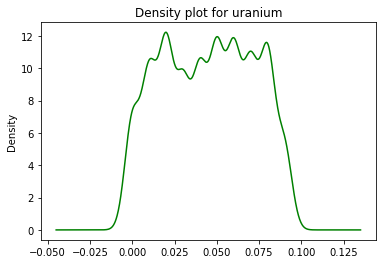

In [34]:
df.uranium.plot.density(color='green')
plt.title('Density plot for uranium')
plt.savefig('uranium.png')
plt.show()

## Correlation between features

In [35]:
corr = df.corr() 
corr.style.background_gradient(cmap='magma')

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,-0.071040,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,0.105856,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,0.011596,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,-0.002429,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,0.021255,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,0.003432,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,0.002193,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,0.006183,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,0.018261,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,0.618535,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077


## Columns which don't have any value above the threshold value

In [36]:
def threshold(column,value):
    sum = 0
    for i in df[str(column)]:
        if i>value:
            sum = sum + 1
    print(column+" has "+str(sum)+" values above the threshold ")

In [37]:
keys = threshold_dict.keys()
values = threshold_dict.values()

In [38]:
for i,j in zip(keys,values):
    threshold(i,j)

aluminium has 863 values above the threshold 
ammonia has 0 values above the threshold 
arsenic has 6821 values above the threshold 
barium has 2642 values above the threshold 
cadmium has 6518 values above the threshold 
chloramine has 2128 values above the threshold 
chromium has 3503 values above the threshold 
copper has 2329 values above the threshold 
flouride has 0 values above the threshold 
bacteria has 5203 values above the threshold 
viruses has 6693 values above the threshold 
lead has 7241 values above the threshold 
nitrates has 3966 values above the threshold 
nitrites has 5980 values above the threshold 
mercury has 6081 values above the threshold 
perchlorate has 181 values above the threshold 
radium has 1726 values above the threshold 
selenium has 0 values above the threshold 
silver has 3151 values above the threshold 
uranium has 0 values above the threshold 


In [39]:
count1 = df["is_safe"].value_counts()[1]
count0 = df["is_safe"].value_counts()[0]

In [40]:
count_above_1 = 0
count_below_1 = 0
count_above_0 = 0
count_below_0 = 0
safe = df["is_safe"]
for i,l in zip(threshold_dict.keys(),threshold_dict.values()):
    mineral = df[str(i)]
    for j,k in zip(mineral,safe):
        if k==1:
            if j>l:
                count_above_1 = count_above_1 + 1
            else:
                count_below_1 = count_below_1 + 1
        else:
            if j>l:
                count_above_0 = count_above_0 + 1
            else:
                count_below_0 = count_below_0 + 1
    print(str(i)+" 1: above threshold "+str(count_above_1)+" 1:below threshold "+str(count_below_1)+" 0: above threshold "+str(count_above_0)+" 0: below threshold "+str(count_below_0))
    print(str(i)+" 1: above threshold "+str((count_above_1)/count1)+" 1:below threshold "+str((count_below_1)/count1)+" 0: above threshold "+str((count_above_0)/count0)+" 0: below threshold "+str((count_below_0)/count0))
    count_above_1 = 0
    count_below_1 = 0
    count_above_0 = 0
    count_below_0 = 0

aluminium 1: above threshold 285 1:below threshold 627 0: above threshold 578 0: below threshold 6506
aluminium 1: above threshold 0.3125 1:below threshold 0.6875 0: above threshold 0.0815923207227555 0: below threshold 0.9184076792772445
ammonia 1: above threshold 0 1:below threshold 912 0: above threshold 0 0: below threshold 7084
ammonia 1: above threshold 0.0 1:below threshold 1.0 0: above threshold 0.0 0: below threshold 1.0
arsenic 1: above threshold 685 1:below threshold 227 0: above threshold 6136 0: below threshold 948
arsenic 1: above threshold 0.7510964912280702 1:below threshold 0.24890350877192982 0: above threshold 0.8661773009599096 0: below threshold 0.13382269904009034
barium 1: above threshold 391 1:below threshold 521 0: above threshold 2251 0: below threshold 4833
barium 1: above threshold 0.42872807017543857 1:below threshold 0.5712719298245614 0: above threshold 0.3177583286278938 0: below threshold 0.6822416713721061
cadmium 1: above threshold 478 1:below thresho

## is_safe column which is the target class has 88% of the value classified as 0 and only 11% of the values classified as 1

In [183]:
from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.model_selection import feature_importances

## Feature Extraction

## Pearson Correlation

In [202]:

feature_correlation(X, y, method='mutual_info-classification');

ValueError: ignored

In [203]:
from scipy.stats import pointbiserialr

In [57]:
cor_target = df["is_safe"]

In [58]:
for i in threshold_dict.keys():
    pbc = pointbiserialr(df[str(i)],cor_target)
    print(i+" "+str(pbc))

aluminium PointbiserialrResult(correlation=0.3339737735314536, pvalue=1.3644997105025007e-207)
ammonia PointbiserialrResult(correlation=-0.022919011509633703, pvalue=0.04042546752087036)
arsenic PointbiserialrResult(correlation=-0.12336198804817085, pvalue=1.7218152957156371e-28)
barium PointbiserialrResult(correlation=0.09085848410080495, pvalue=3.947285518783222e-16)
cadmium PointbiserialrResult(correlation=-0.2560339278141225, pvalue=7.043961649657063e-120)
chloramine PointbiserialrResult(correlation=0.18670437817218424, pvalue=1.2247347924131437e-63)
chromium PointbiserialrResult(correlation=0.18230627521767853, pvalue=1.0347921024650036e-60)
copper PointbiserialrResult(correlation=0.029498391409952942, pvalue=0.008341668445494348)
flouride PointbiserialrResult(correlation=0.006550242315146571, pvalue=0.5581176589277761)
bacteria PointbiserialrResult(correlation=-0.022077427584784322, pvalue=0.04836998993969865)
viruses PointbiserialrResult(correlation=-0.09703976928333194, pvalue=

## We can drop  flouride and selenium as they have a p-value greater than 0.05 and hence are not statistically significant

## p-value less than 0.05 then variables are statistically significant

# <font color="blue">Class Imbalance</font>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


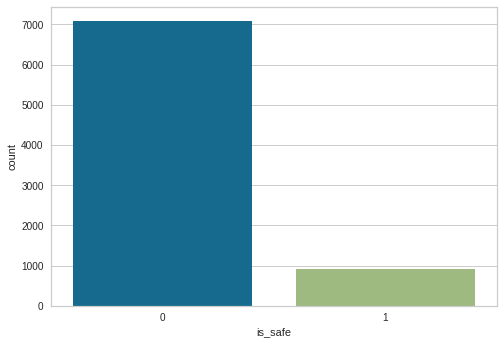

In [59]:
sns.countplot(df['is_safe'])
plt.savefig('class_imbalance.png')
plt.show()

In [60]:
count1 = df["is_safe"].value_counts()[1]
count0 = df["is_safe"].value_counts()[0]

## Percentage of 0's 

In [61]:
print(count0/(count1+count0)*100)

88.59429714857428


## Percentage of 1's

In [62]:
print(count1/(count1+count0)*100)

11.405702851425712


In [63]:
y = df[target_col]

In [64]:
X = df.drop(target_col, axis=1)

# <font color="blue">Models</font>

## Split train and test

### performed standard scaling

In [65]:
from sklearn.model_selection import train_test_split 

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df.is_safe)

In [69]:
from sklearn import decomposition

In [70]:
X1 = X

In [71]:
y1 = y

In [72]:
pca = decomposition.PCA(0.95)
print("Before PCA-",X1.shape)
X1 = pca.fit_transform(X1)
print("After PCA-",X1.shape)

Before PCA- (7996, 20)
After PCA- (7996, 18)


In [73]:
import plotly.express as px

In [74]:
fig = px.scatter( x=X1[:,0],
                    y=X1[:,1],
                    template='simple_white',
                    color_discrete_sequence=px.colors.qualitative.G10,
                    title='PCA Scatterplot'
                    )
fig.update_layout(xaxis_title="PC1",yaxis_title="PC2")
fig.show()

In [75]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify=df.is_safe)

## Logistic Regression

In [76]:
model_lr1 = LogisticRegression()

In [77]:
model_lr2 = LogisticRegression()

In [78]:
model_lr1.fit(X_train, y_train)

LogisticRegression()

In [79]:
model_lr2.fit(X_train1, y_train1)

LogisticRegression()

In [80]:
predictions1 = model_lr1.predict(X_test)

In [81]:
predictions2 = model_lr2.predict(X_test1)

In [82]:
score1 = model_lr1.score(X_test, y_test)
print(score1)

0.91125


In [83]:
score2 = model_lr2.score(X_test1, y_test1)
print(score2)

0.906875


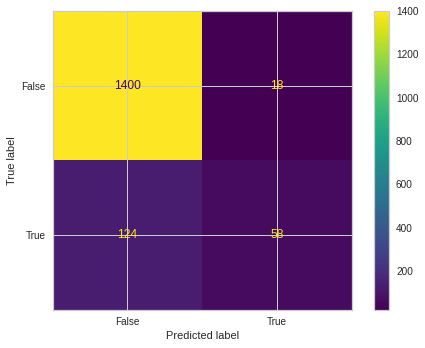

In [84]:
cm = metrics.confusion_matrix(y_test,predictions1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.savefig("confusion_matrix_no_pca.png")
plt.show()

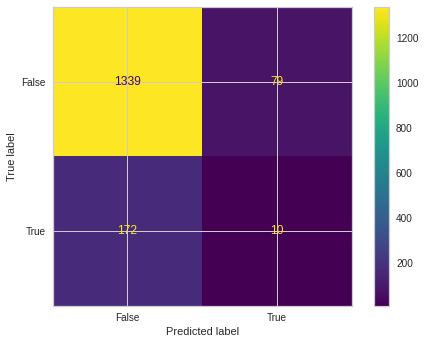

In [85]:
cm = metrics.confusion_matrix(y_test,predictions2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.savefig("confusion_matrix_with_pca.png")
plt.show()

In [86]:
Accuracy1 = metrics.accuracy_score(y_test, predictions1)

In [87]:
Accuracy2 = metrics.accuracy_score(y_test1, predictions2)

In [88]:
Precision1 = metrics.precision_score(y_test, predictions1)

In [89]:
Precision2 = metrics.precision_score(y_test1, predictions2)

In [90]:
Sensitivity_recall1 = metrics.recall_score(y_test, predictions1)

In [91]:
Sensitivity_recall2 = metrics.recall_score(y_test1, predictions2)

In [92]:
Specificity1 = metrics.recall_score(y_test, predictions1, pos_label=0)

In [93]:
Specificity2 = metrics.recall_score(y_test1, predictions2, pos_label=0)

In [94]:
F1_score1 = metrics.f1_score(y_test, predictions1)

In [95]:
F1_score2 = metrics.f1_score(y_test1, predictions2)

In [96]:
print({"Accuracy":Accuracy1,"Precision":Precision1,"Sensitivity_recall":Sensitivity_recall1,"Specificity":Specificity1,"F1_score":F1_score1})

{'Accuracy': 0.91125, 'Precision': 0.7631578947368421, 'Sensitivity_recall': 0.31868131868131866, 'Specificity': 0.9873060648801129, 'F1_score': 0.44961240310077516}


In [97]:
print({"Accuracy":Accuracy2,"Precision":Precision2,"Sensitivity_recall":Sensitivity_recall2,"Specificity":Specificity2,"F1_score":F1_score2})

{'Accuracy': 0.906875, 'Precision': 0.6853932584269663, 'Sensitivity_recall': 0.33516483516483514, 'Specificity': 0.9802538787023978, 'F1_score': 0.4501845018450184}


In [98]:

print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1418
           1       0.76      0.32      0.45       182

    accuracy                           0.91      1600
   macro avg       0.84      0.65      0.70      1600
weighted avg       0.90      0.91      0.89      1600



## Recall of minority class is very less so we apply smote and then PCA

In [99]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

In [100]:
sm = SMOTE(random_state=42,sampling_strategy=0.3)

In [101]:
X_smote, y_smote = sm.fit_resample(X_train1, y_train1)

In [102]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote== 0)))

Before OverSampling, counts of label '1': 730
Before OverSampling, counts of label '0': 5666 

After OverSampling, the shape of train_X: (7365, 18)
After OverSampling, the shape of train_y: (7365,) 

After OverSampling, counts of label '1': 1699
After OverSampling, counts of label '0': 5666


In [103]:
model_smote = LogisticRegression()

In [104]:
model_smote.fit(X_smote, y_smote)

LogisticRegression()

In [105]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset: 50.54945054945055%


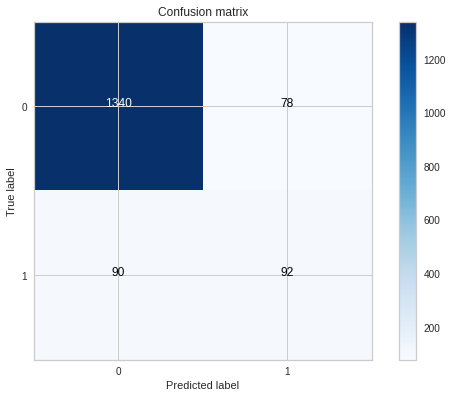

In [106]:
y_pre = model_smote.predict(X_test1)

cnf_matrix = confusion_matrix(y_test1, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.savefig("PCASMOTE.png")
plt.show()

In [107]:
print(classification_report(y_test1, y_pre))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1418
           1       0.54      0.51      0.52       182

    accuracy                           0.90      1600
   macro avg       0.74      0.73      0.73      1600
weighted avg       0.89      0.90      0.89      1600



In [108]:


Accuracy = metrics.accuracy_score(y_test1, y_pre)

In [109]:
Precision = metrics.precision_score(y_test1, y_pre)

In [110]:
Sensitivity_recall = metrics.recall_score(y_test1, y_pre)

In [111]:
Specificity = metrics.recall_score(y_test1, y_pre, pos_label=0)

In [112]:
F1_score = metrics.f1_score(y_test1, y_pre)

In [113]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.895, 'Precision': 0.5411764705882353, 'Sensitivity_recall': 0.5054945054945055, 'Specificity': 0.9449929478138223, 'F1_score': 0.5227272727272727}


## SVM(weak learner)

In [114]:

from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,f1_score

In [115]:
svc_model1 = SVC(class_weight='balanced', probability=True)
svc_model1.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True)

In [116]:
svc_model2 = SVC(class_weight='balanced', probability=True)
svc_model2.fit(X_train1, y_train1)

SVC(class_weight='balanced', probability=True)

In [117]:
svc_model = SVC(class_weight='balanced', probability=True)
svc_model.fit(X_smote, y_smote)

SVC(class_weight='balanced', probability=True)

In [118]:
from sklearn.metrics import f1_score,roc_auc_score,precision_score,accuracy_score,recall_score

In [119]:
svc_predict = svc_model.predict(X_test1)
print('ROCAUC score:',roc_auc_score(y_test1, svc_predict))
print('Accuracy score:',accuracy_score(y_test1, svc_predict))
print('F1 score:',f1_score(y_test1, svc_predict))
print("precision: ",precision_score(y_test1,svc_predict))
print("recall_score: ",recall_score(y_test1,svc_predict))

ROCAUC score: 0.8677327608921404
Accuracy score: 0.905625
F1 score: 0.6636971046770601
precision:  0.5580524344569289
recall_score:  0.8186813186813187


In [120]:
svc_predict1 = svc_model1.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, svc_predict1))
print('Accuracy score:',accuracy_score(y_test, svc_predict1))
print('F1 score:',f1_score(y_test, svc_predict1))
print("precision: ",precision_score(y_test,svc_predict1))
print("recall_score: ",recall_score(y_test,svc_predict1))

ROCAUC score: 0.8967474697375967
Accuracy score: 0.901875
F1 score: 0.6735966735966735
precision:  0.5418060200668896
recall_score:  0.8901098901098901


In [121]:
svc_predict2 = svc_model2.predict(X_test1)
print('ROCAUC score:',roc_auc_score(y_test1, svc_predict2))
print('Accuracy score:',accuracy_score(y_test1, svc_predict2))
print('F1 score:',f1_score(y_test1, svc_predict2))
print("precision: ",precision_score(y_test1,svc_predict2))
print("recall_score: ",recall_score(y_test1,svc_predict2))

ROCAUC score: 0.8684224801996312
Accuracy score: 0.885625
F1 score: 0.6272912423625255
precision:  0.49838187702265374
recall_score:  0.8461538461538461


## Random Forest(Highest acuracy for now)(No scaling)

In [123]:
df1 = pd.read_csv('waterQuality1.csv')

In [124]:
df1['is_safe']=df1['is_safe'].map({'0':0,'1':1,'#NUM!':0})
ammo=[]
for i in range(len(df1)):
    s=df1.loc[i,'ammonia']
    if s=='#NUM!':
        ammo+=[0]
    else:
        ammo+=[float(s)]
df1['ammonia']=ammo

In [125]:
X3 = df1.iloc[:,0:20].values
y3 = df1.iloc[:,20].values

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
X3 = sc.fit_transform(X3)
  
pca = PCA(n_components = 18)
X_pca = pca.fit_transform(X3)

In [127]:
sm = SMOTE(random_state=42,sampling_strategy=0.3)
X_smote3, y_smote3 = sm.fit_resample(X_pca, y3)
from sklearn.model_selection import train_test_split
  
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote3, y_smote3, test_size = 0.2, random_state = 0)

In [128]:
from sklearn.ensemble import RandomForestClassifier

rfc3 = RandomForestClassifier()

rfc3.fit(X_smote_train, y_smote_train)

rfc_predict3 = rfc3.predict(X_smote_test)
print('ROCAUC score:',roc_auc_score(y_smote_test, rfc_predict3))
print('Accuracy score:',accuracy_score(y_smote_test, rfc_predict3))
print('F1 score:',f1_score(y_smote_test, rfc_predict3))
print("precision: ",precision_score(y_smote_test,rfc_predict3))
print("recall_score: ",recall_score(y_smote_test,rfc_predict3))

ROCAUC score: 0.8941660034880374
Accuracy score: 0.935973955507325
F1 score: 0.8513853904282115
precision:  0.8871391076115486
recall_score:  0.8184019370460048


## Gaussian Naive Bayes(Weak Learner)(NO scaling)

In [135]:
X_nosc = df.drop(target_col, axis=1)
y_nosc = df[target_col]

In [136]:
X_train_nosc, X_test_nosc, y_train_nosc, y_test_nosc = train_test_split(X_nosc, y_nosc, test_size=0.2)

In [138]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_nosc, y_train_nosc)
y_pred2 = model.predict(X_test_nosc)

In [139]:




from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test_nosc, y_pred2)*100,'%')

Accuracy: 85.625 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



precision:  0.4053030303030303
recall_score:  0.5944444444444444
f1_score:  0.48198198198198194


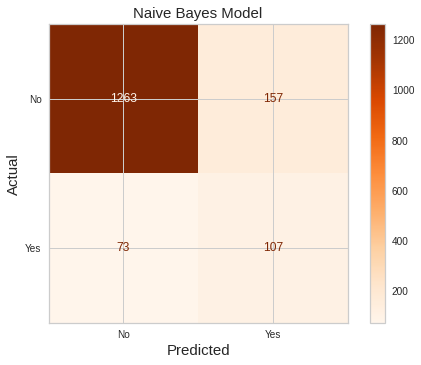

In [140]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
class_names = ["No",'Yes']
plot_confusion_matrix(model, X_test_nosc, y_test_nosc,
                              display_labels=class_names,
                              cmap="Oranges")
plt.title('Naive Bayes Model', fontsize = 15)
plt.ylabel('Actual',fontsize = 15)
plt.xlabel('Predicted',fontsize=15)
print("precision: ",precision_score(y_test_nosc,y_pred2))
print("recall_score: ",recall_score(y_test_nosc,y_pred2))
print("f1_score: ",f1_score(y_test_nosc,y_pred2))

## Decision Tree

In [141]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [142]:
from sklearn.metrics import f1_score,roc_auc_score,precision_score,accuracy_score,recall_score

In [143]:
dtc = DecisionTreeClassifier()

In [144]:
dtc = dtc.fit(X_train,y_train)

In [145]:
y_pred_dtc = dtc.predict(X_test)

In [146]:
print('ROCAUC score:',roc_auc_score(y_test,y_pred_dtc ))
print('Accuracy score:',accuracy_score(y_test, y_pred_dtc))
print('F1 score:',f1_score(y_test, y_pred_dtc))
print("precision: ",precision_score(y_test,y_pred_dtc))
print("recall_score: ",recall_score(y_test,y_pred_dtc))

ROCAUC score: 0.886994528743471
Accuracy score: 0.9525
F1 score: 0.7934782608695653
precision:  0.7849462365591398
recall_score:  0.8021978021978022


##K-nearest Neighbour- KNN

In [158]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

In [159]:
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1418
           1       0.77      0.32      0.46       182

    accuracy                           0.91      1600
   macro avg       0.84      0.66      0.70      1600
weighted avg       0.90      0.91      0.90      1600



In [160]:
classifier.fit(X_smote_train, y_smote_train)  
y_smote_pred= classifier.predict(X_smote_test)
print(classification_report(y_smote_test, y_smote_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1430
           1       0.67      0.88      0.76       413

    accuracy                           0.88      1843
   macro avg       0.82      0.88      0.84      1843
weighted avg       0.90      0.88      0.88      1843



##XGBoost

In [161]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [162]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [163]:

# evaluate prediction
accuracy = accuracy_score(y_test, predictions)
print(precision_recall_fscore_support(y_test, predictions,average='micro'))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(0.959375, 0.959375, 0.959375, None)
Accuracy: 95.94%


In [164]:
model = XGBClassifier()
model.fit(X_smote_train, y_smote_train)
y_pred_smote = model.predict(X_smote_test)
predictions = [round(value) for value in y_pred_smote]

In [165]:
accuracy = accuracy_score(y_smote_test, predictions)
print(precision_recall_fscore_support(y_smote_test, predictions,average='micro'))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(0.9007053716766142, 0.9007053716766142, 0.9007053716766142, None)
Accuracy: 90.07%


## Ensemble

In [147]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [148]:
from sklearn.naive_bayes import GaussianNB

In [149]:
from sklearn.svm import SVC

In [150]:
clf1 = LogisticRegression(random_state=1)
clf2 = SVC(class_weight='balanced', probability=True)
clf3 = GaussianNB()

In [151]:
eclf1 = VotingClassifier(estimators=[('dt', dtc),('svm', clf2), ('gnb', clf3)])

In [152]:
eclf1 = eclf1.fit(X_smote_train ,y_smote_train)

In [153]:
vote_pred = eclf1.predict(X_smote_test)

In [154]:
from sklearn.metrics import f1_score,roc_auc_score,precision_score,accuracy_score,recall_score

In [155]:
print('ROCAUC score:',roc_auc_score(y_smote_test, vote_pred))
print('Accuracy score:',accuracy_score(y_smote_test, vote_pred))
print('F1 score:',f1_score(y_smote_test, vote_pred))
print("precision: ",precision_score(y_smote_test,vote_pred))
print("recall_score: ",recall_score(y_smote_test,vote_pred))

ROCAUC score: 0.9088860292250123
Accuracy score: 0.9267498643516007
F1 score: 0.8428405122235156
precision:  0.8116591928251121
recall_score:  0.8765133171912833


In [156]:
import joblib

In [157]:
joblib.dump(eclf1,'Ensemble_jlib')

['Ensemble_jlib']

## Does better than both SVM, GNB and Logistic Regression